In [1]:
import pandas as pd
pd.set_option('display.max_columns', 500)

In [72]:
df = pd.read_csv('kc_house_data.csv')
import scipy
df['price_boxcox'] = scipy.stats.boxcox(df.price)[0]
df.sqft_basement = df.sqft_basement.replace('?', np.nan).astype(float)
df = df.dropna()

In [3]:
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


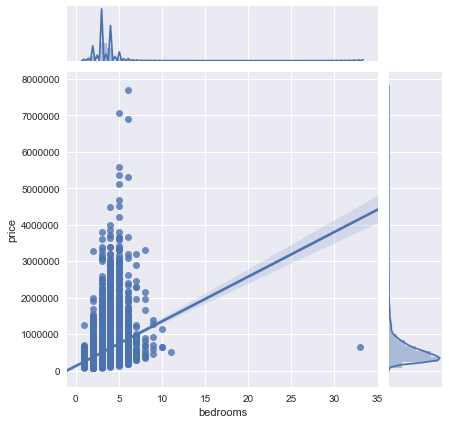

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')
sns.jointplot(df.bedrooms, df.price, kind="reg")

In [6]:
from statsmodels.formula.api import ols
lr_model_bedroom = ols(formula='price~bedrooms', data=df).fit()

In [7]:
pred_val_bedroom = lr_model_bedroom.fittedvalues.copy()
true_val_bedroom = df['price'].values.copy()
residual = true_val_bedroom - pred_val_bedroom

Text(0.5, 1.0, 'residual plot of bedrooms')

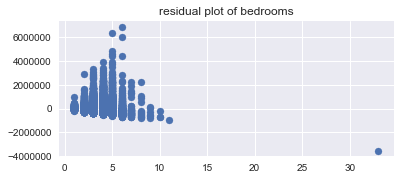

In [8]:
fig, ax = plt.subplots(figsize=(6,2.5))
ax.scatter(df['bedrooms'],residual)
ax.set_title('residual plot of bedrooms')

In [10]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'price_boxcox'],
      dtype='object')

In [65]:
len(['bedrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 
        'sqft_basement', 'yr_built', 'yr_renovated', 
         'sqft_lot15'])

11

In [12]:
df = df.dropna()

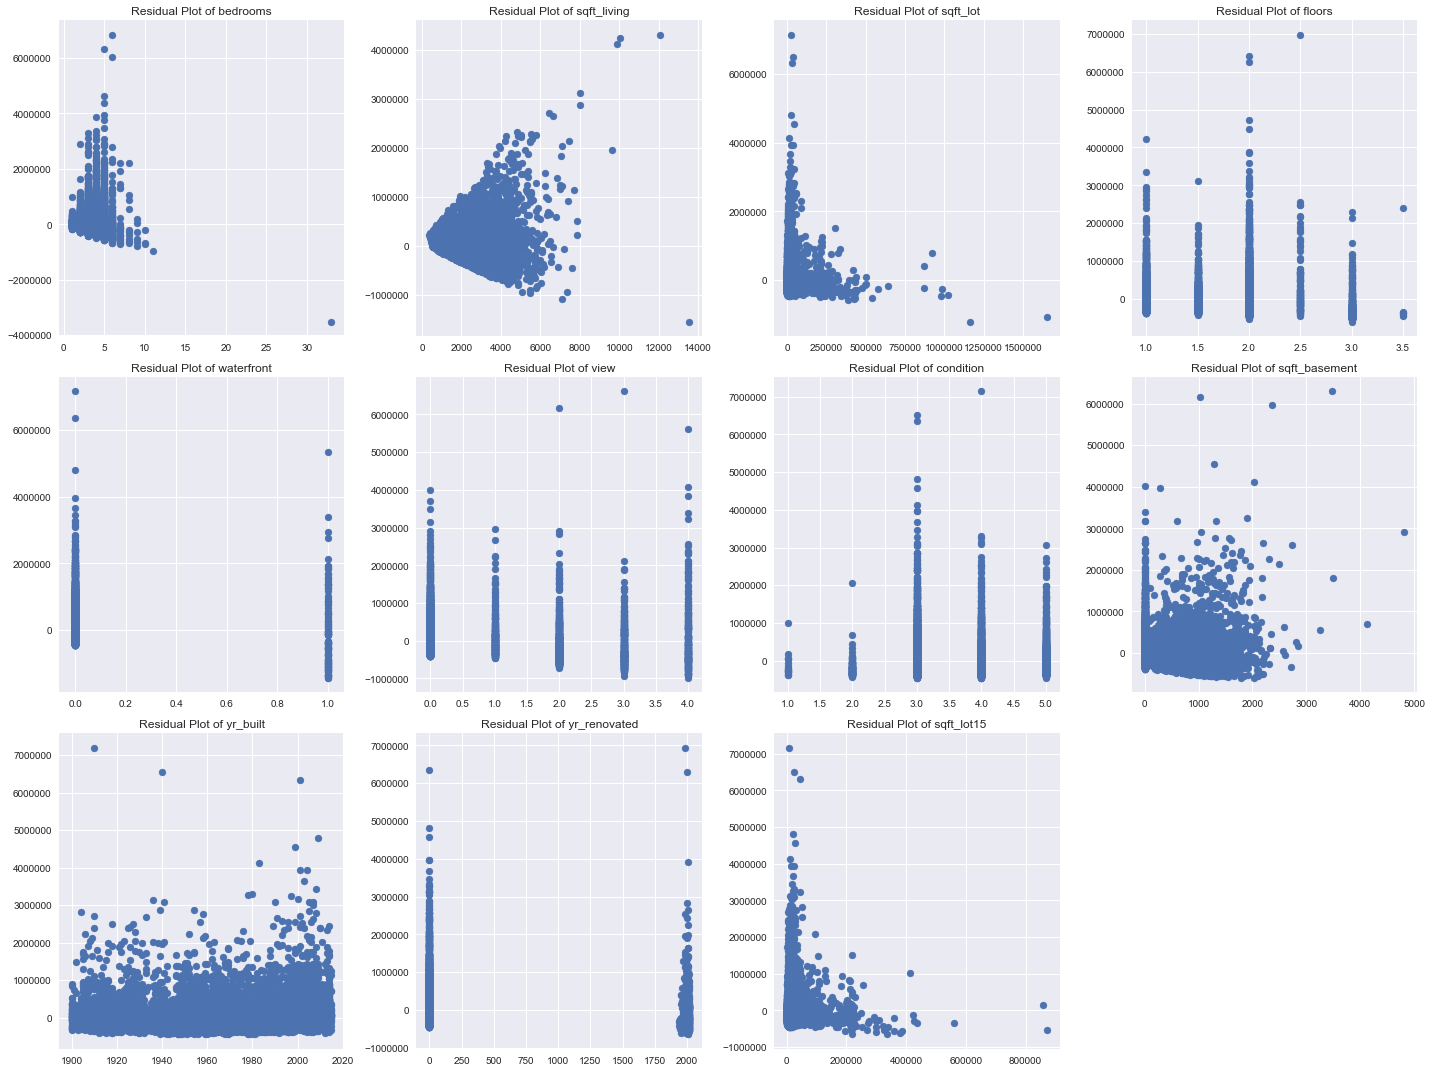

In [73]:


# pass in figsize=(20,40), and also set the facecolor parameter to 'white'
plt.figure(figsize=(20,15), facecolor='white')

# Complete the line below so that the first loop variable is the called index,
# and the second loop variable is the tuple (countryname, population). 
for i,index in enumerate(['bedrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 
        'sqft_basement', 'yr_built', 'yr_renovated', 
         'sqft_lot15']):
    
    # Get the unique subplot where the plot we're creating during this iteration
    # of the loop will live. Our subplot will be 30 rows of 9 plots each. 
    # Set the third value to be index+1
    ax = plt.subplot(3, 4, i+1)
    lr_model_bedroom = ols(formula=f'price~{index}', data=df).fit()
    pred_val_bedroom = lr_model_bedroom.fittedvalues.copy()
    true_val_bedroom = df['price'].values.copy()
    residual = true_val_bedroom - pred_val_bedroom
    
    
    # Complete the line to create the plot for this subplot. 
    # Same visualizations as we created above!
    #df.scatter(x=f'{index}', y='price_boxcox', ax=ax, legend=False)
    ax.scatter(df[f'{index}'],residual)
    
    # Set the title of each plot, so we know which country it represents
    ax.set_title(f'Residual Plot of {index}')
plt.tight_layout()

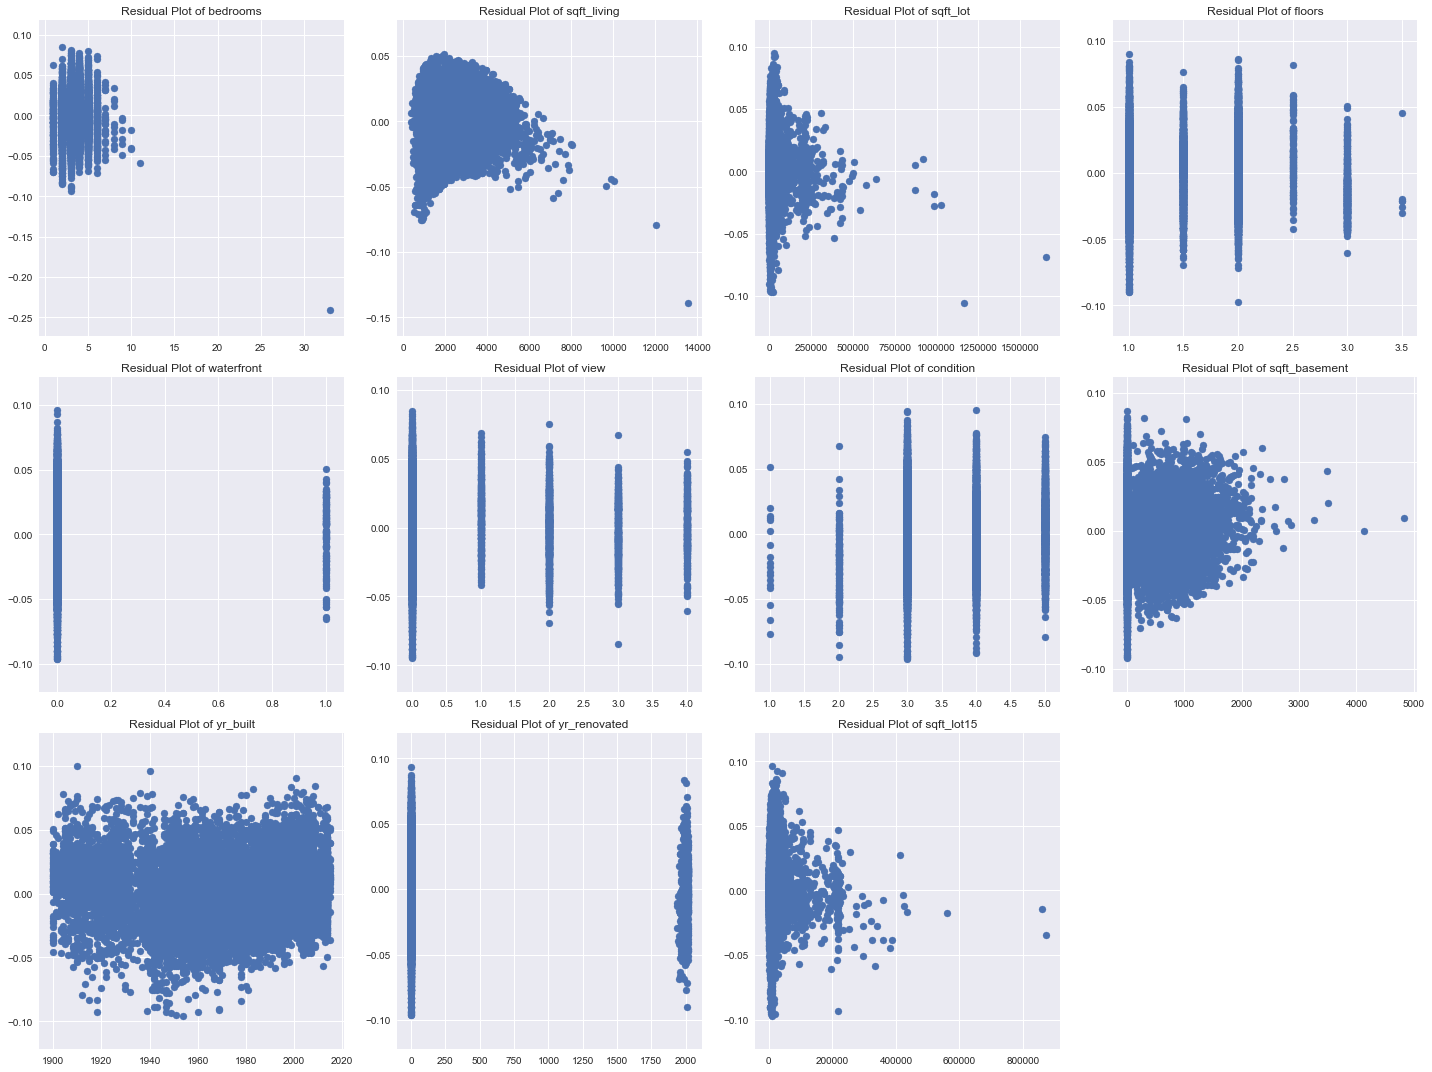

In [75]:


# pass in figsize=(20,40), and also set the facecolor parameter to 'white'
plt.figure(figsize=(20,15), facecolor='white')

# Complete the line below so that the first loop variable is the called index,
# and the second loop variable is the tuple (countryname, population). 
for i,index in enumerate(['bedrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 
        'sqft_basement', 'yr_built', 'yr_renovated', 
         'sqft_lot15']):
    
    # Get the unique subplot where the plot we're creating during this iteration
    # of the loop will live. Our subplot will be 30 rows of 9 plots each. 
    # Set the third value to be index+1
    ax = plt.subplot(3, 4, i+1)
    lr_model_bedroom = ols(formula=f'price_boxcox~{index}', data=df).fit()
    pred_val_bedroom = lr_model_bedroom.fittedvalues.copy()
    true_val_bedroom = df['price_boxcox'].values.copy()
    residual = true_val_bedroom - pred_val_bedroom
    
    
    # Complete the line to create the plot for this subplot. 
    # Same visualizations as we created above!
    #df.scatter(x=f'{index}', y='price_boxcox', ax=ax, legend=False)
    ax.scatter(df[f'{index}'],residual)
    
    # Set the title of each plot, so we know which country it represents
    ax.set_title(f'Residual Plot of {index}')
plt.tight_layout()

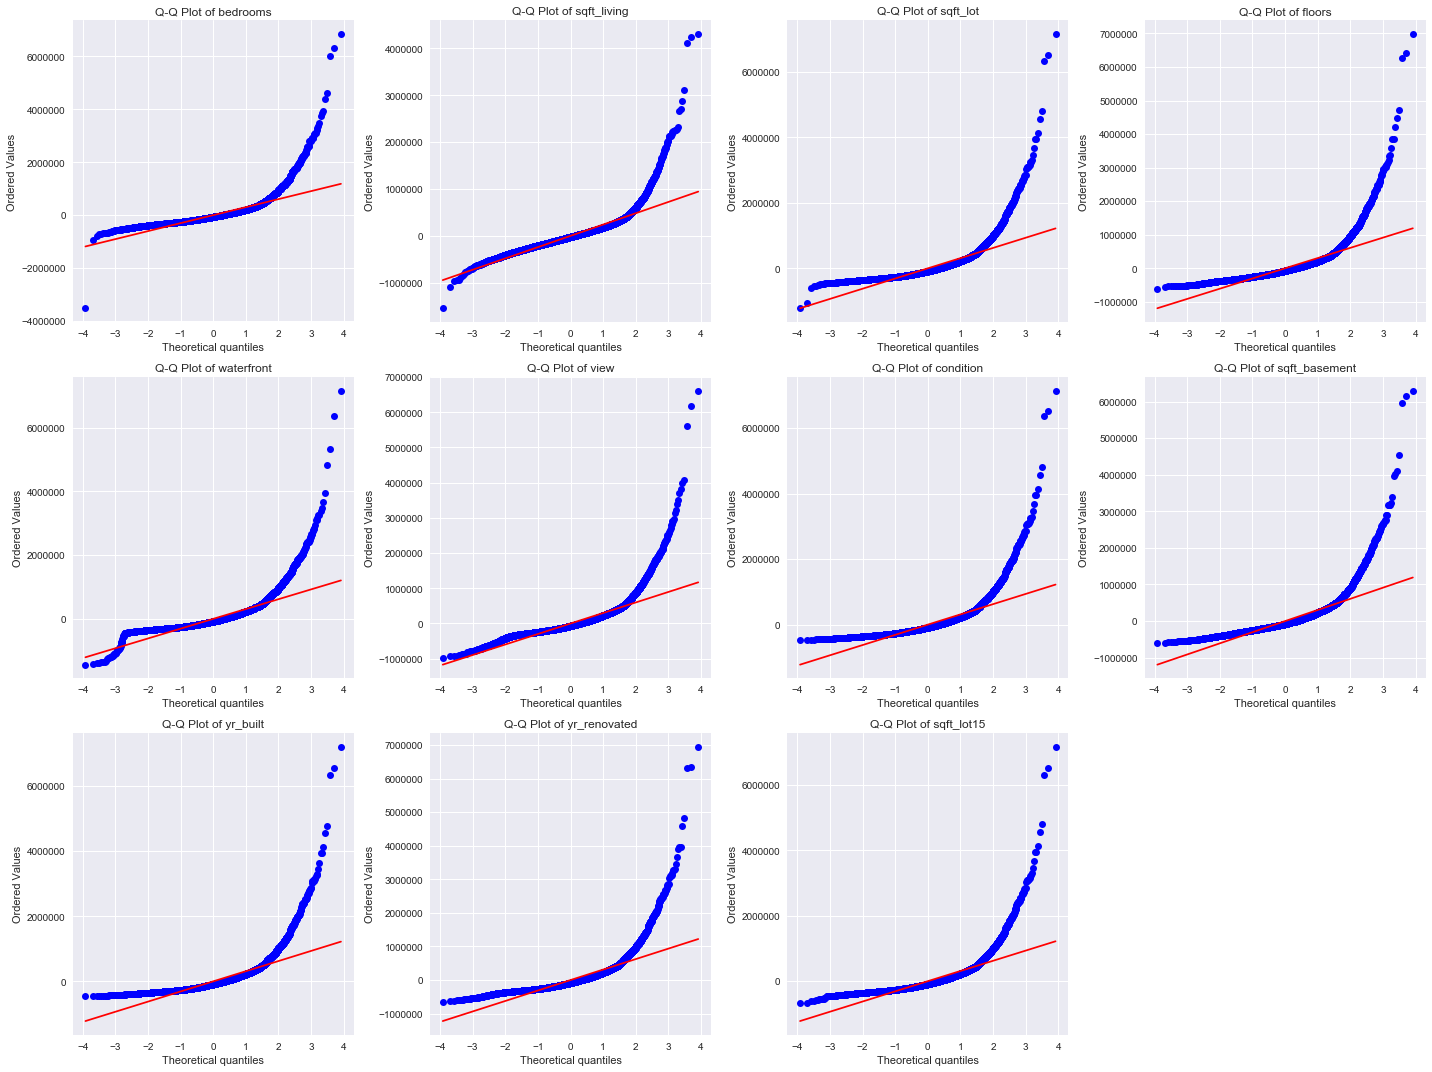

In [76]:
import scipy as sp
# pass in figsize=(20,40), and also set the facecolor parameter to 'white'
plt.figure(figsize=(20,15), facecolor='white')

# Complete the line below so that the first loop variable is the called index,
# and the second loop variable is the tuple (countryname, population). 
for i,index in enumerate(['bedrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 
        'sqft_basement', 'yr_built', 'yr_renovated', 
         'sqft_lot15']):
    
    # Get the unique subplot where the plot we're creating during this iteration
    # of the loop will live. Our subplot will be 30 rows of 9 plots each. 
    # Set the third value to be index+1
    ax = plt.subplot(3, 4, i+1)
    lr_model = ols(formula=f'price~{index}', data=df).fit()
    
    pred_val = lr_model.fittedvalues.copy()
    true_val = df['price'].values.copy()
    residual = true_val - pred_val
    sp.stats.probplot(residual, plot=ax, fit=True)
    
    # Set the title of each plot, so we know which country it represents
    ax.set_title(f'Q-Q Plot of {index}')
plt.tight_layout()

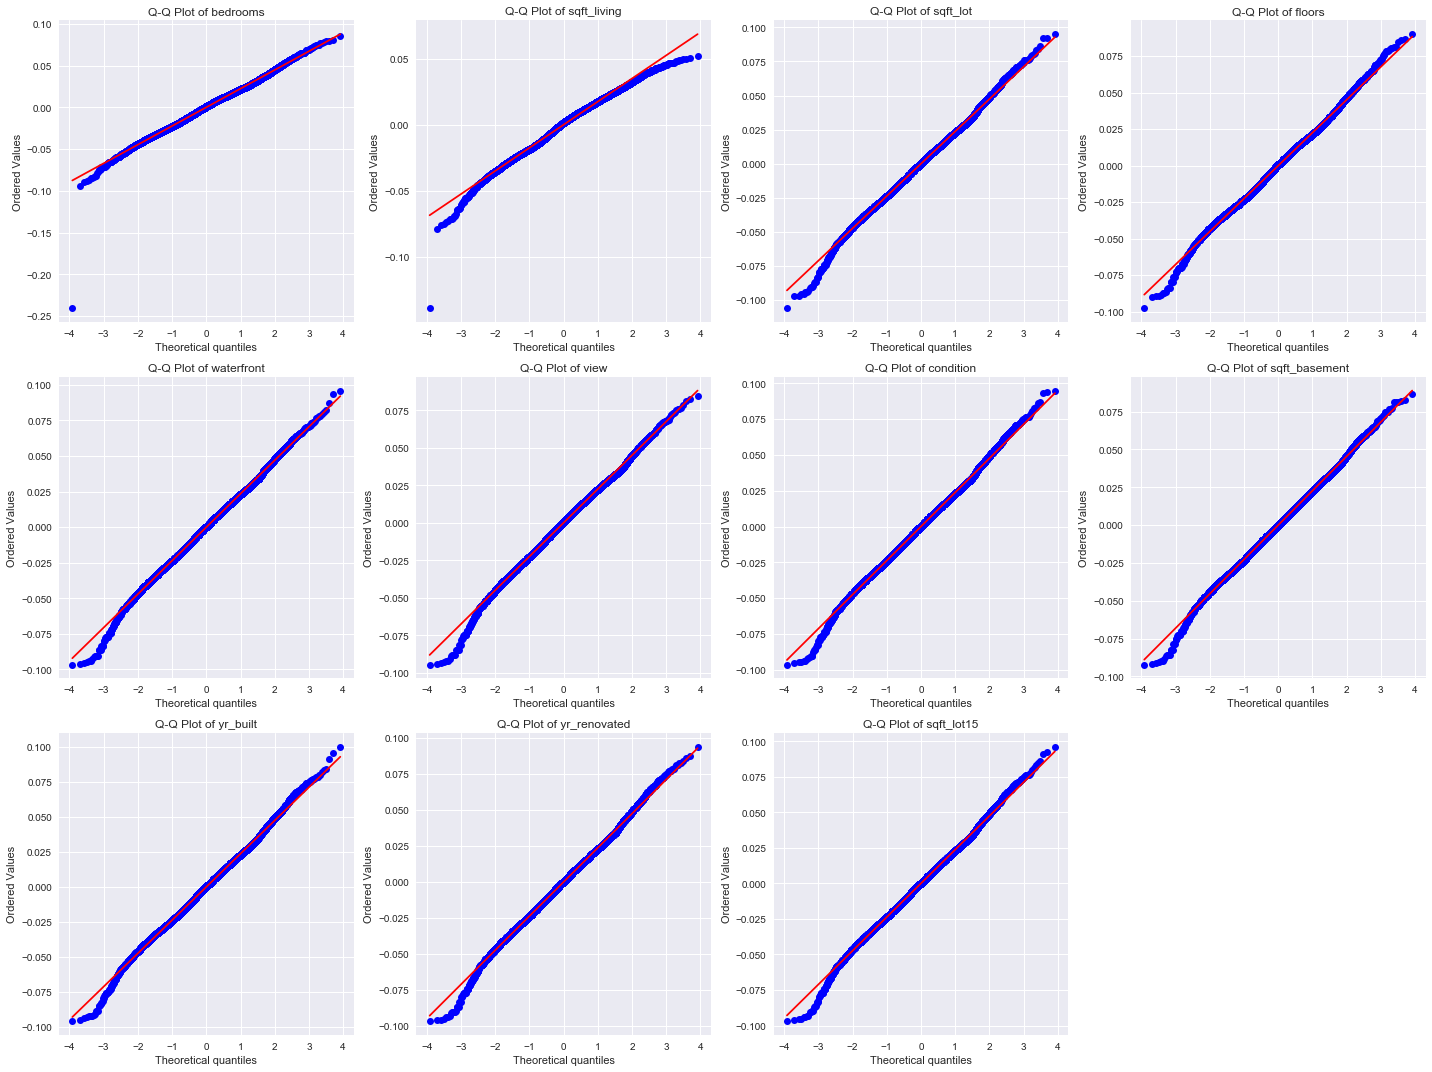

In [77]:
import scipy as sp
# pass in figsize=(20,40), and also set the facecolor parameter to 'white'
plt.figure(figsize=(20,15), facecolor='white')

# Complete the line below so that the first loop variable is the called index,
# and the second loop variable is the tuple (countryname, population). 
for i,index in enumerate(['bedrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 
        'sqft_basement', 'yr_built', 'yr_renovated', 
         'sqft_lot15']):
    
    # Get the unique subplot where the plot we're creating during this iteration
    # of the loop will live. Our subplot will be 30 rows of 9 plots each. 
    # Set the third value to be index+1
    ax = plt.subplot(3, 4, i+1)
    lr_model = ols(formula=f'price_boxcox~{index}', data=df).fit()
    
    pred_val = lr_model.fittedvalues.copy()
    true_val = df['price_boxcox'].values.copy()
    residual = true_val - pred_val
    sp.stats.probplot(residual, plot=ax, fit=True)
    
    # Set the title of each plot, so we know which country it represents
    ax.set_title(f'Q-Q Plot of {index}')
plt.tight_layout()

In [18]:
df.price == df.price_boxcox

1        False
3        False
4        False
5        False
6        False
         ...  
21591    False
21592    False
21593    False
21594    False
21596    False
Length: 15762, dtype: bool

In [ ]:
import seaborn as sns
%matplotlib inline
sns.jointplot(df.bedrooms, df.price, kind="reg")

In [6]:
zipcode_dummy

,zipcode_cat_98002,zipcode_cat_98003,zipcode_cat_98004,zipcode_cat_98005,zipcode_cat_98006,zipcode_cat_98007,zipcode_cat_98008,zipcode_cat_98010,zipcode_cat_98011,zipcode_cat_98014,zipcode_cat_98019,zipcode_cat_98022,zipcode_cat_98023,zipcode_cat_98024,zipcode_cat_98027,zipcode_cat_98028,zipcode_cat_98029,zipcode_cat_98030,zipcode_cat_98031,zipcode_cat_98032,zipcode_cat_98033,zipcode_cat_98034,zipcode_cat_98038,zipcode_cat_98039,zipcode_cat_98040,zipcode_cat_98042,zipcode_cat_98045,zipcode_cat_98052,zipcode_cat_98053,zipcode_cat_98055,zipcode_cat_98056,zipcode_cat_98058,zipcode_cat_98059,zipcode_cat_98065,zipcode_cat_98070,zipcode_cat_98072,zipcode_cat_98074,zipcode_cat_98075,zipcode_cat_98077,zipcode_cat_98092,zipcode_cat_98102,zipcode_cat_98103,zipcode_cat_98105,zipcode_cat_98106,zipcode_cat_98107,zipcode_cat_98108,zipcode_cat_98109,zipcode_cat_98112,zipcode_cat_98115,zipcode_cat_98116,zipcode_cat_98117,zipcode_cat_98118,zipcode_cat_98119,zipcode_cat_98122,zipcode_cat_98125,zipcode_cat_98126,zipcode_cat_98133,zipcode_cat_98136,zipcode_cat_98144,zipcode_cat_98146,zipcode_cat_98148,zipcode_cat_98155,zipcode_cat_98166,zipcode_cat_98168,zipcode_cat_98177,zipcode_cat_98178,zipcode_cat_98188,zipcode_cat_98198,zipcode_cat_98199
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

# Column Names and descriptions for Kings County Data Set
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

In [79]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'price_boxcox'],
      dtype='object')

In [83]:
king_predictors = df.loc[:,['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',  'sqft_living15', 'sqft_lot15']]
corr = king_predictors.corr()

In [87]:
corr_df = corr[abs(corr)>0.75]

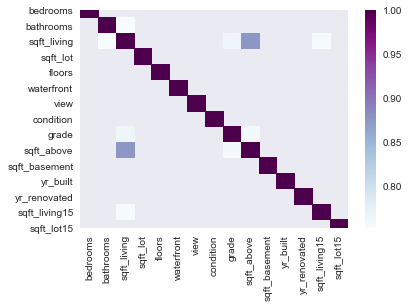

In [90]:
sns.heatmap(corr_df, cmap = 'BuPu')

# As we can see above, 'bathroom', 'grade', 'sqft_above', and 'sqft_living15' are hightly correlated, so for the stability of the model, we will exclude them from our predictor variables in our regression analysis.

In [31]:
df = df[['bedrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_lot15', 'price_boxcox']]

In [32]:
import numpy as np
df.sqft_basement = df.sqft_basement.replace('?', np.nan).astype(float)

/usr/local/lib/python3.7/site-packages/pandas/core/generic.py:5209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [33]:
df

,bedrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_basement,yr_built,yr_renovated,sqft_lot15,price_boxcox
1,3,2570,7242,2.0,0.0,0.0,3,400.0,1951,1991.0,7639,3.906437
3,4,1960,5000,1.0,0.0,0.0,5,910.0,1965,0.0,5000,3.910876
4,3,1680,8080,1.0,0.0,0.0,3,0.0,1987,0.0,7503,3.904344
5,4,5420,101930,1.0,0.0,0.0,3,1530.0,2001,0.0,101930,3.935551
6,3,1715,6819,2.0,0.0,0.0,3,NaN,1995,0.0,6819,3.875003
8,3,1780,7470,1.0,0.0,0.0,3,730.0,1960,0.0,8113,3.869557
9,3,1890,6560,2.0,0.0,0.0,3,0.0,2003,0.0,7570,3.885285
11,2,1160,6000,1.0,0.0,0.0,4,300.0,1942,0.0,6000,3.900919
13,3,1370,9680,1.0,0.0,0.0,4,0.0,1977,0.0,10208,3.894473
14,5,1810,4850,1.5,0.0,0.0,3,0.0,1900,0.0,4850,3.905853


In [37]:
df1 = pd.read_csv('kc_house_data.csv')
zipcode_dummy = pd.get_dummies(df1['zipcode'], prefix = 'zipcode_cat', drop_first=True)
df = pd.concat([df, zipcode_dummy], axis=1)
df = df.dropna()

In [38]:
df

,bedrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_basement,yr_built,yr_renovated,sqft_lot15,price_boxcox,zipcode_cat_98002,zipcode_cat_98003,zipcode_cat_98004,zipcode_cat_98005,zipcode_cat_98006,zipcode_cat_98007,zipcode_cat_98008,zipcode_cat_98010,zipcode_cat_98011,zipcode_cat_98014,zipcode_cat_98019,zipcode_cat_98022,zipcode_cat_98023,zipcode_cat_98024,zipcode_cat_98027,zipcode_cat_98028,zipcode_cat_98029,zipcode_cat_98030,zipcode_cat_98031,zipcode_cat_98032,zipcode_cat_98033,zipcode_cat_98034,zipcode_cat_98038,zipcode_cat_98039,zipcode_cat_98040,zipcode_cat_98042,zipcode_cat_98045,zipcode_cat_98052,zipcode_cat_98053,zipcode_cat_98055,zipcode_cat_98056,zipcode_cat_98058,zipcode_cat_98059,zipcode_cat_98065,zipcode_cat_98070,zipcode_cat_98072,zipcode_cat_98074,zipcode_cat_98075,zipcode_cat_98077,zipcode_cat_98092,zipcode_cat_98102,zipcode_cat_98103,zipcode_cat_98105,zipcode_cat_98106,zipcode_cat_98107,zipcode_cat_98108,zipcode_cat_98109,zipcode_cat_98112,zipcode_cat_98115,zipcode_cat_98116,zipcode_cat_98117,zipcode_cat_98118,zipcode_cat_98119,zipcode_cat_98122,zipcode_cat_98125,zipcode_cat_98126,zipcode_cat_98133,zipcode_cat_98136,zipcode_cat_98144,zipcode_cat_98146,zipcode_cat_98148,zipcode_cat_98155,zipcode_cat_98166,zipcode_cat_98168,zipcode_cat_98177,zipcode_cat_98178,zipcode_cat_98188,zipcode_cat_98198,zipcode_cat_98199
1,3.0,2570.0,7242.0,2.0,0.0,0.0,3.0,400.0,1951.0,1991.0,7639.0,3.906437,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4.0,1960.0,5000.0,1.0,0.0,0.0,5.0,910.0,1965.0,0.0,5000.0,3.910876,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,3.0,1680.0,8080.0,1.0,0.0,0.0,3.0,0.0,1987.0,0.0,7503.0,3.904344,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,4.0,5420.0,101930.0,1.0,0.0,0.0,3.0,1530.0,2001.0,0.0,101930.0,3.935551,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,3.0,1780.0,7470.0,1.0,0.0,0.0,3.0,730.0,1960.0,0.0,8113.0,3.869557,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
9,3.0,1890.0,6560.0,2.0,0.0,0.0,3.0,0.0,2003.0,0.0,7570.0,3.885285,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11,2.0,1160.0,6000.0,1.0,0.0,0.0,4.0,300.0,1942.0,0.0,6000.0,3.900919,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13,3.0,1370.0,9680.0,1.0,0.0,0.0,4.0,0.0,1977.0,0.0,10208.0,3.894473,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14,5.0,1810.0,4850.0,1.5,0.0,0.0,3.0,0.0,1900.0,0.0,4850.0,3.905853,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15,4.0,2950.0,5000.0,2.0,0.0,3.0,3.0,970.0,1979.0,0.0,4000.0,3.913627,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [40]:

ols_king = ols('price_boxcox~bedrooms+sqft_living+sqft_lot+floors+waterfront+view+condition+sqft_basement+yr_built+yr_renovated+sqft_lot15+zipcode_cat_98002+zipcode_cat_98003+zipcode_cat_98004+zipcode_cat_98005+zipcode_cat_98006+zipcode_cat_98007+zipcode_cat_98008+zipcode_cat_98010+zipcode_cat_98011+zipcode_cat_98014+zipcode_cat_98019+zipcode_cat_98022+zipcode_cat_98023+zipcode_cat_98024+zipcode_cat_98027+zipcode_cat_98028+zipcode_cat_98029+zipcode_cat_98030+zipcode_cat_98031+zipcode_cat_98032+zipcode_cat_98033+zipcode_cat_98034+zipcode_cat_98038+zipcode_cat_98039+zipcode_cat_98040+zipcode_cat_98042+zipcode_cat_98045+zipcode_cat_98052+zipcode_cat_98053+zipcode_cat_98055+zipcode_cat_98056+zipcode_cat_98058+zipcode_cat_98059+zipcode_cat_98065+zipcode_cat_98070+zipcode_cat_98072+zipcode_cat_98074+zipcode_cat_98075+zipcode_cat_98077+zipcode_cat_98092+zipcode_cat_98102+zipcode_cat_98103+zipcode_cat_98105+zipcode_cat_98106+zipcode_cat_98107+zipcode_cat_98108+zipcode_cat_98109+zipcode_cat_98112+zipcode_cat_98115+zipcode_cat_98116+zipcode_cat_98117+zipcode_cat_98118+zipcode_cat_98119+zipcode_cat_98122+zipcode_cat_98125+zipcode_cat_98126+zipcode_cat_98133+zipcode_cat_98136+zipcode_cat_98144+zipcode_cat_98146+zipcode_cat_98148+zipcode_cat_98155+zipcode_cat_98166+zipcode_cat_98168+zipcode_cat_98177+zipcode_cat_98178+zipcode_cat_98188+zipcode_cat_98198+zipcode_cat_98199', data=df).fit()
ols_king.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           price_boxcox   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     976.7
Date:                Sun, 20 Oct 2019   Prob (F-statistic):               0.00
Time:                        14:58:09   Log-Likelihood:                 51704.
No. Observations:               15429   AIC:                        -1.032e+05
Df Residuals:                   15348   BIC:                        -1.026e+05
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             3.7457      0.007    517.882      0.000       3.732       3.760
bedrooms              0.0002   9.24e-05      2.040      0.041     7.4e-06       0.000
sqft_living        1.285e-05   1.29e-07     99.314      0.000    1.26e-05    1.31e-05
sqft_lot            2.41e-08   2.37e-09     10.169      0.000    1.95e-08    2.87e-08
floors               -0.0008      0.000     -4.038      0.000      -0.001      -0.000
waterfront            0.0128      0.001     14.418      0.000       0.011       0.015
view                  0.0029      0.000     27.088      0.000       0.003       0.003
condition             0.0024      0.000     19.932      0.000       0.002       0.003
sqft_basement     -4.584e-06   2.18e-07    -21.076      0.000   -5.01e-06   -4.16e-06
yr_built           4.918e-05   3.63e-06     13.559      0.000    4.21e-05    5.63e-05
yr_renovated       1.998e-06   1.84e-07     10.841      0.000    1.64e-06    2.36e-06
sqft_lot15         8.931e-09   3.69e-09      2.423      0.015    1.71e-09    1.62e-08
zipcode_cat_98002    -0.0027      0.001     -3.033      0.002      -0.004      -0.001
zipcode_cat_98003     0.0026      0.001      3.313      0.001       0.001       0.004
zipcode_cat_98004     0.0462      0.001     58.851      0.000       0.045       0.048
zipcode_cat_98005     0.0357      0.001     38.427      0.000       0.034       0.038
zipcode_cat_98006     0.0308      0.001     43.426      0.000       0.029       0.032
zipcode_cat_98007     0.0311      0.001     30.888      0.000       0.029       0.033
zipcode_cat_98008     0.0304      0.001     38.060      0.000       0.029       0.032
zipcode_cat_98010     0.0107      0.001      9.162      0.000       0.008       0.013
zipcode_cat_98011     0.0224      0.001     24.737      0.000       0.021       0.024
zipcode_cat_98014     0.0139      0.001     13.084      0.000       0.012       0.016
zipcode_cat_98019     0.0155      0.001     16.541      0.000       0.014       0.017
zipcode_cat_98022     0.0022      0.001      2.589      0.010       0.001       0.004
zipcode_cat_98023     0.0013      0.001      1.840      0.066   -8.41e-05       0.003
zipcode_cat_98024     0.0193      0.001     15.349      0.000       0.017       0.022
zipcode_cat_98027     0.0249      0.001     33.715      0.000       0.023       0.026
zipcode_cat_98028     0.0209      0.001     26.087      0.000       0.019       0.022
zipcode_cat_98029     0.0293      0.001     37.910      0.000       0.028       0.031
zipcode_cat_98030     0.0046      0.001      5.502      0.000       0.003       0.006
zipcode_cat_98031     0.0053      0.001      6.576      0.000       0.004       0.007
zipcode_cat_98032    -0.0007      0.001     -0.659      0.510      -0.003       0.001
zipcode_cat_98033     0.0348      0.001     48.114      0.000       0.033

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X = df[['bedrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view',
       'condition', 'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_lot15', 'zipcode_cat_98002', 'zipcode_cat_98003', 'zipcode_cat_98004',
       'zipcode_cat_98005', 'zipcode_cat_98006', 'zipcode_cat_98007',
       'zipcode_cat_98008', 'zipcode_cat_98010', 'zipcode_cat_98011',
       'zipcode_cat_98014', 'zipcode_cat_98019', 'zipcode_cat_98022',
       'zipcode_cat_98023', 'zipcode_cat_98024', 'zipcode_cat_98027',
       'zipcode_cat_98028', 'zipcode_cat_98029', 'zipcode_cat_98030',
       'zipcode_cat_98031', 'zipcode_cat_98032', 'zipcode_cat_98033',
       'zipcode_cat_98034', 'zipcode_cat_98038', 'zipcode_cat_98039',
       'zipcode_cat_98040', 'zipcode_cat_98042', 'zipcode_cat_98045',
       'zipcode_cat_98052', 'zipcode_cat_98053', 'zipcode_cat_98055',
       'zipcode_cat_98056', 'zipcode_cat_98058', 'zipcode_cat_98059',
       'zipcode_cat_98065', 'zipcode_cat_98070', 'zipcode_cat_98072',
       'zipcode_cat_98074', 'zipcode_cat_98075', 'zipcode_cat_98077',
       'zipcode_cat_98092', 'zipcode_cat_98102', 'zipcode_cat_98103',
       'zipcode_cat_98105', 'zipcode_cat_98106', 'zipcode_cat_98107',
       'zipcode_cat_98108', 'zipcode_cat_98109', 'zipcode_cat_98112',
       'zipcode_cat_98115', 'zipcode_cat_98116', 'zipcode_cat_98117',
       'zipcode_cat_98118', 'zipcode_cat_98119', 'zipcode_cat_98122',
       'zipcode_cat_98125', 'zipcode_cat_98126', 'zipcode_cat_98133',
       'zipcode_cat_98136', 'zipcode_cat_98144', 'zipcode_cat_98146',
       'zipcode_cat_98148', 'zipcode_cat_98155', 'zipcode_cat_98166',
       'zipcode_cat_98168', 'zipcode_cat_98177', 'zipcode_cat_98178',
       'zipcode_cat_98188', 'zipcode_cat_98198', 'zipcode_cat_98199']]
y = df[['price_boxcox']]

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [44]:
for_train = pd.concat([X_train, y_train], axis=1)

In [45]:
ols_train_king = ols('price_boxcox~bedrooms+sqft_living+sqft_lot+floors+waterfront+view+condition+sqft_basement+yr_built+yr_renovated+sqft_lot15+zipcode_cat_98002+zipcode_cat_98003+zipcode_cat_98004+zipcode_cat_98005+zipcode_cat_98006+zipcode_cat_98007+zipcode_cat_98008+zipcode_cat_98010+zipcode_cat_98011+zipcode_cat_98014+zipcode_cat_98019+zipcode_cat_98022+zipcode_cat_98023+zipcode_cat_98024+zipcode_cat_98027+zipcode_cat_98028+zipcode_cat_98029+zipcode_cat_98030+zipcode_cat_98031+zipcode_cat_98032+zipcode_cat_98033+zipcode_cat_98034+zipcode_cat_98038+zipcode_cat_98039+zipcode_cat_98040+zipcode_cat_98042+zipcode_cat_98045+zipcode_cat_98052+zipcode_cat_98053+zipcode_cat_98055+zipcode_cat_98056+zipcode_cat_98058+zipcode_cat_98059+zipcode_cat_98065+zipcode_cat_98070+zipcode_cat_98072+zipcode_cat_98074+zipcode_cat_98075+zipcode_cat_98077+zipcode_cat_98092+zipcode_cat_98102+zipcode_cat_98103+zipcode_cat_98105+zipcode_cat_98106+zipcode_cat_98107+zipcode_cat_98108+zipcode_cat_98109+zipcode_cat_98112+zipcode_cat_98115+zipcode_cat_98116+zipcode_cat_98117+zipcode_cat_98118+zipcode_cat_98119+zipcode_cat_98122+zipcode_cat_98125+zipcode_cat_98126+zipcode_cat_98133+zipcode_cat_98136+zipcode_cat_98144+zipcode_cat_98146+zipcode_cat_98148+zipcode_cat_98155+zipcode_cat_98166+zipcode_cat_98168+zipcode_cat_98177+zipcode_cat_98178+zipcode_cat_98188+zipcode_cat_98198+zipcode_cat_98199', data=for_train).fit()
ols_train_king.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           price_boxcox   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     765.1
Date:                Sun, 20 Oct 2019   Prob (F-statistic):               0.00
Time:                        14:59:41   Log-Likelihood:                 41288.
No. Observations:               12343   AIC:                        -8.241e+04
Df Residuals:                   12262   BIC:                        -8.181e+04
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             3.7515      0.008    460.609      0.000       3.736       3.767
bedrooms              0.0002      0.000      1.916      0.055   -4.52e-06       0.000
sqft_living        1.287e-05   1.46e-07     88.163      0.000    1.26e-05    1.32e-05
sqft_lot            2.43e-08   2.67e-09      9.097      0.000    1.91e-08    2.95e-08
floors               -0.0006      0.000     -2.684      0.007      -0.001      -0.000
waterfront            0.0117      0.001     11.602      0.000       0.010       0.014
view                  0.0030      0.000     24.468      0.000       0.003       0.003
condition             0.0024      0.000     17.461      0.000       0.002       0.003
sqft_basement     -4.496e-06   2.44e-07    -18.391      0.000   -4.98e-06   -4.02e-06
yr_built            4.64e-05   4.09e-06     11.355      0.000    3.84e-05    5.44e-05
yr_renovated       2.102e-06   2.11e-07      9.941      0.000    1.69e-06    2.52e-06
sqft_lot15         1.048e-08   4.03e-09      2.599      0.009    2.58e-09    1.84e-08
zipcode_cat_98002    -0.0030      0.001     -3.009      0.003      -0.005      -0.001
zipcode_cat_98003     0.0020      0.001      2.210      0.027       0.000       0.004
zipcode_cat_98004     0.0458      0.001     52.443      0.000       0.044       0.048
zipcode_cat_98005     0.0347      0.001     33.377      0.000       0.033       0.037
zipcode_cat_98006     0.0302      0.001     38.225      0.000       0.029       0.032
zipcode_cat_98007     0.0306      0.001     26.681      0.000       0.028       0.033
zipcode_cat_98008     0.0298      0.001     33.645      0.000       0.028       0.032
zipcode_cat_98010     0.0104      0.001      7.706      0.000       0.008       0.013
zipcode_cat_98011     0.0221      0.001     22.088      0.000       0.020       0.024
zipcode_cat_98014     0.0138      0.001     11.197      0.000       0.011       0.016
zipcode_cat_98019     0.0152      0.001     14.335      0.000       0.013       0.017
zipcode_cat_98022     0.0018      0.001      1.925      0.054   -3.33e-05       0.004
zipcode_cat_98023     0.0009      0.001      1.126      0.260      -0.001       0.002
zipcode_cat_98024     0.0191      0.001     13.479      0.000       0.016       0.022
zipcode_cat_98027     0.0243      0.001     29.706      0.000       0.023       0.026
zipcode_cat_98028     0.0203      0.001     22.863      0.000       0.019       0.022
zipcode_cat_98029     0.0288      0.001     33.495      0.000       0.027       0.030
zipcode_cat_98030     0.0042      0.001      4.441      0.000       0.002       0.006
zipcode_cat_98031     0.0049      0.001      5.366      0.000       0.003       0.007
zipcode_cat_98032    -0.0020      0.001     -1.661      0.097      -0.004       0.000
zipcode_cat_98033     0.0342      0.001     42.077      0.000       0.033

In [46]:
model = pd.DataFrame(ols_train_king.params)

In [49]:
pd.set_option('display.float_format', lambda x: '%.9f' % x)
pd.options.display.max_rows = 999
model

,0
Intercept,3.751483954
bedrooms,0.000196739
sqft_living,0.000012870
sqft_lot,0.000000024
floors,-0.000587198
waterfront,0.011702405
view,0.002965531
condition,0.002356967
sqft_basement,-0.000004496
yr_built,0.000046403


In [50]:
apply_string = ""
apply_string += str(model.iloc[1,0])
apply_string
    

'0.00019673922864004692'

In [51]:
(enumerate(model.index))

(0, 'Intercept')

In [54]:
for i,v in enumerate(model.index):
    apply_string += f"+x['{v}']*{model.iloc[i,0]}"
apply_string

"0.00019673922864004692+x['Intercept']*3.7514839543374654+x['bedrooms']*0.00019673922864004692+x['sqft_living']*1.2870273946609379e-05+x['sqft_lot']*2.4297163999426646e-08+x['floors']*-0.0005871981902920024+x['waterfront']*0.011702405309919669+x['view']*0.0029655313206316493+x['condition']*0.0023569672179658326+x['sqft_basement']*-4.4963778310482745e-06+x['yr_built']*4.640290845773178e-05+x['yr_renovated']*2.1019734720603586e-06+x['sqft_lot15']*1.0480612843691239e-08+x['zipcode_cat_98002']*-0.0030426543594480834+x['zipcode_cat_98003']*0.001956292693871176+x['zipcode_cat_98004']*0.04579738813173134+x['zipcode_cat_98005']*0.03474005615004663+x['zipcode_cat_98006']*0.03016877062765257+x['zipcode_cat_98007']*0.03059834661828312+x['zipcode_cat_98008']*0.0298310119562893+x['zipcode_cat_98010']*0.010372922700247061+x['zipcode_cat_98011']*0.022067804545153995+x['zipcode_cat_98014']*0.013825960764720088+x['zipcode_cat_98019']*0.015166440778803143+x['zipcode_cat_98022']*0.0018319902858938125+x['

In [55]:
X_test['predicted_values'] = X_test.apply(lambda x: 0.00019673922864004692+x['bedrooms']*0.00019673922864004692+x['sqft_living']*1.2870273946609379e-05+x['sqft_lot']*2.4297163999426646e-08+x['floors']*-0.0005871981902920024+x['waterfront']*0.011702405309919669+x['view']*0.0029655313206316493+x['condition']*0.0023569672179658326+x['sqft_basement']*-4.4963778310482745e-06+x['yr_built']*4.640290845773178e-05+x['yr_renovated']*2.1019734720603586e-06+x['sqft_lot15']*1.0480612843691239e-08+x['zipcode_cat_98002']*-0.0030426543594480834+x['zipcode_cat_98003']*0.001956292693871176+x['zipcode_cat_98004']*0.04579738813173134+x['zipcode_cat_98005']*0.03474005615004663+x['zipcode_cat_98006']*0.03016877062765257+x['zipcode_cat_98007']*0.03059834661828312+x['zipcode_cat_98008']*0.0298310119562893+x['zipcode_cat_98010']*0.010372922700247061+x['zipcode_cat_98011']*0.022067804545153995+x['zipcode_cat_98014']*0.013825960764720088+x['zipcode_cat_98019']*0.015166440778803143+x['zipcode_cat_98022']*0.0018319902858938125+x['zipcode_cat_98023']*0.0008825070378667365+x['zipcode_cat_98024']*0.01907575972959315+x['zipcode_cat_98027']*0.024339612426639057+x['zipcode_cat_98028']*0.020276255335941514+x['zipcode_cat_98029']*0.028790574109638953+x['zipcode_cat_98030']*0.004164516369960354+x['zipcode_cat_98031']*0.004861755303940738+x['zipcode_cat_98032']*-0.001982291687929991+x['zipcode_cat_98033']*0.03417741771530983+x['zipcode_cat_98034']*0.025443383248831435+x['zipcode_cat_98038']*0.008501797051694099+x['zipcode_cat_98039']*0.046019671230826564+x['zipcode_cat_98040']*0.03771304568520075+x['zipcode_cat_98042']*0.003954829507984547+x['zipcode_cat_98045']*0.015631881059552998+x['zipcode_cat_98052']*0.03039080346410542+x['zipcode_cat_98053']*0.0264737236374838+x['zipcode_cat_98055']*0.007115036347186687+x['zipcode_cat_98056']*0.013965822480051696+x['zipcode_cat_98058']*0.008968086394982658+x['zipcode_cat_98059']*0.01665976258565652+x['zipcode_cat_98065']*0.017892960329620306+x['zipcode_cat_98070']*0.015764050962815197+x['zipcode_cat_98072']*0.023677863012016995+x['zipcode_cat_98074']*0.027930536666276692+x['zipcode_cat_98075']*0.027732078904737823+x['zipcode_cat_98077']*0.02309954616058937+x['zipcode_cat_98092']*0.0032266501142491012+x['zipcode_cat_98102']*0.04211267237989458+x['zipcode_cat_98103']*0.03559304413675814+x['zipcode_cat_98105']*0.041916367425424664+x['zipcode_cat_98106']*0.013567191558386291+x['zipcode_cat_98107']*0.03779944828674036+x['zipcode_cat_98108']*0.016178988176820248+x['zipcode_cat_98109']*0.042324567528368606+x['zipcode_cat_98112']*0.04663792976282355+x['zipcode_cat_98115']*0.03593394754375313+x['zipcode_cat_98116']*0.03466761322460123+x['zipcode_cat_98117']*0.03566722034908001+x['zipcode_cat_98118']*0.02107584697368433+x['zipcode_cat_98119']*0.04377394987781071+x['zipcode_cat_98122']*0.036373020776528306+x['zipcode_cat_98125']*0.025176945548115295+x['zipcode_cat_98126']*0.024557553959569805+x['zipcode_cat_98133']*0.02077647624538366+x['zipcode_cat_98136']*0.030619011097779265+x['zipcode_cat_98144']*0.02899783929622708+x['zipcode_cat_98146']*0.010216656094734811+x['zipcode_cat_98148']*0.004476569603984173+x['zipcode_cat_98155']*0.019327119408916647+x['zipcode_cat_98166']*0.0151724785758854+x['zipcode_cat_98168']*0.00234259345772695+x['zipcode_cat_98177']*0.02846511664098244+x['zipcode_cat_98178']*0.006225469164911686+x['zipcode_cat_98188']*0.0034493312800998434+x['zipcode_cat_98198']*0.003639170978097327+x['zipcode_cat_98199']*0.038267202250218874, axis=1)

/usr/local/Cellar/ipython/7.6.1/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [56]:
X_test

,bedrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_basement,yr_built,yr_renovated,sqft_lot15,zipcode_cat_98002,zipcode_cat_98003,zipcode_cat_98004,zipcode_cat_98005,zipcode_cat_98006,zipcode_cat_98007,zipcode_cat_98008,zipcode_cat_98010,zipcode_cat_98011,zipcode_cat_98014,zipcode_cat_98019,zipcode_cat_98022,zipcode_cat_98023,zipcode_cat_98024,zipcode_cat_98027,zipcode_cat_98028,zipcode_cat_98029,zipcode_cat_98030,zipcode_cat_98031,zipcode_cat_98032,zipcode_cat_98033,zipcode_cat_98034,zipcode_cat_98038,zipcode_cat_98039,zipcode_cat_98040,zipcode_cat_98042,zipcode_cat_98045,zipcode_cat_98052,zipcode_cat_98053,zipcode_cat_98055,zipcode_cat_98056,zipcode_cat_98058,zipcode_cat_98059,zipcode_cat_98065,zipcode_cat_98070,zipcode_cat_98072,zipcode_cat_98074,zipcode_cat_98075,zipcode_cat_98077,zipcode_cat_98092,zipcode_cat_98102,zipcode_cat_98103,zipcode_cat_98105,zipcode_cat_98106,zipcode_cat_98107,zipcode_cat_98108,zipcode_cat_98109,zipcode_cat_98112,zipcode_cat_98115,zipcode_cat_98116,zipcode_cat_98117,zipcode_cat_98118,zipcode_cat_98119,zipcode_cat_98122,zipcode_cat_98125,zipcode_cat_98126,zipcode_cat_98133,zipcode_cat_98136,zipcode_cat_98144,zipcode_cat_98146,zipcode_cat_98148,zipcode_cat_98155,zipcode_cat_98166,zipcode_cat_98168,zipcode_cat_98177,zipcode_cat_98178,zipcode_cat_98188,zipcode_cat_98198,zipcode_cat_98199,predicted_values
15459,4.000000000,2270.000000000,9247.000000000,1.000000000,0.000000000,0.000000000,5.000000000,770.000000000,1972.000000000,0.000000000,9163.000000000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.159930661
6852,3.000000000,1770.000000000,8640.000000000,1.000000000,0.000000000,0.000000000,3.000000000,350.000000000,1986.000000000,0.000000000,7974.000000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.120926989
21491,3.000000000,1350.000000000,886.000000000,3.000000000,0.000000000,0.000000000,3.000000000,80.000000000,2006.000000000,0.000000000,886.000000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.146845482
15110,3.000000000,1810.000000000,12420.000000000,1.000000000,0.000000000,0.000000000,4.000000000,0.000000000,1957.000000000,0.000000000,12330.000000000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.153995324
11602,4.000000000,1975.000000000,8734.000000000,2.000000000,0.000000000,0.000000000,3.000000000,0.000000000,1996.000000000,0.000000000,8538.000000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.133722690
16656,4.000000000,3010.000000000,15992.000000000,2.000000000,0.000000000,0.000000000,3.000000000,0.000000000,1996.000000000,0.000000000,12333.000000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.166489828
13788,3.000000000,1680.000000000,4584.000000000,2.000000000,0.000000000,0.000000000,3.000000000,0.000000000,2003.000000000,0.000000000,4621.000000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.135376180
21044,4.000000000,3250.000000000,5478.000000000,2.000000000,0.000000000,0.000000000,3.000000000,0.000000000,2014.000000000,0.000000000,5482.000000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.160247564
21273,5.000000000,2340.000000000,5670.000000000,2.000000000,0.000000000,0.000000000,3.000000000,0.000000000,2009.000000000,0.000000000,4869.000000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,

In [57]:
x = pd.concat([X_test,y_test],axis=1)

In [59]:
sum((x.price_boxcox - x.predicted_values)**2)/len(x)

14.071004085450099

In [60]:
x_1 = pd.concat([X_train, y_train], axis=1)

In [61]:
x_1['predicted_values'] = x_1.apply(lambda x: 0.00019673922864004692+x['bedrooms']*0.00019673922864004692+x['sqft_living']*1.2870273946609379e-05+x['sqft_lot']*2.4297163999426646e-08+x['floors']*-0.0005871981902920024+x['waterfront']*0.011702405309919669+x['view']*0.0029655313206316493+x['condition']*0.0023569672179658326+x['sqft_basement']*-4.4963778310482745e-06+x['yr_built']*4.640290845773178e-05+x['yr_renovated']*2.1019734720603586e-06+x['sqft_lot15']*1.0480612843691239e-08+x['zipcode_cat_98002']*-0.0030426543594480834+x['zipcode_cat_98003']*0.001956292693871176+x['zipcode_cat_98004']*0.04579738813173134+x['zipcode_cat_98005']*0.03474005615004663+x['zipcode_cat_98006']*0.03016877062765257+x['zipcode_cat_98007']*0.03059834661828312+x['zipcode_cat_98008']*0.0298310119562893+x['zipcode_cat_98010']*0.010372922700247061+x['zipcode_cat_98011']*0.022067804545153995+x['zipcode_cat_98014']*0.013825960764720088+x['zipcode_cat_98019']*0.015166440778803143+x['zipcode_cat_98022']*0.0018319902858938125+x['zipcode_cat_98023']*0.0008825070378667365+x['zipcode_cat_98024']*0.01907575972959315+x['zipcode_cat_98027']*0.024339612426639057+x['zipcode_cat_98028']*0.020276255335941514+x['zipcode_cat_98029']*0.028790574109638953+x['zipcode_cat_98030']*0.004164516369960354+x['zipcode_cat_98031']*0.004861755303940738+x['zipcode_cat_98032']*-0.001982291687929991+x['zipcode_cat_98033']*0.03417741771530983+x['zipcode_cat_98034']*0.025443383248831435+x['zipcode_cat_98038']*0.008501797051694099+x['zipcode_cat_98039']*0.046019671230826564+x['zipcode_cat_98040']*0.03771304568520075+x['zipcode_cat_98042']*0.003954829507984547+x['zipcode_cat_98045']*0.015631881059552998+x['zipcode_cat_98052']*0.03039080346410542+x['zipcode_cat_98053']*0.0264737236374838+x['zipcode_cat_98055']*0.007115036347186687+x['zipcode_cat_98056']*0.013965822480051696+x['zipcode_cat_98058']*0.008968086394982658+x['zipcode_cat_98059']*0.01665976258565652+x['zipcode_cat_98065']*0.017892960329620306+x['zipcode_cat_98070']*0.015764050962815197+x['zipcode_cat_98072']*0.023677863012016995+x['zipcode_cat_98074']*0.027930536666276692+x['zipcode_cat_98075']*0.027732078904737823+x['zipcode_cat_98077']*0.02309954616058937+x['zipcode_cat_98092']*0.0032266501142491012+x['zipcode_cat_98102']*0.04211267237989458+x['zipcode_cat_98103']*0.03559304413675814+x['zipcode_cat_98105']*0.041916367425424664+x['zipcode_cat_98106']*0.013567191558386291+x['zipcode_cat_98107']*0.03779944828674036+x['zipcode_cat_98108']*0.016178988176820248+x['zipcode_cat_98109']*0.042324567528368606+x['zipcode_cat_98112']*0.04663792976282355+x['zipcode_cat_98115']*0.03593394754375313+x['zipcode_cat_98116']*0.03466761322460123+x['zipcode_cat_98117']*0.03566722034908001+x['zipcode_cat_98118']*0.02107584697368433+x['zipcode_cat_98119']*0.04377394987781071+x['zipcode_cat_98122']*0.036373020776528306+x['zipcode_cat_98125']*0.025176945548115295+x['zipcode_cat_98126']*0.024557553959569805+x['zipcode_cat_98133']*0.02077647624538366+x['zipcode_cat_98136']*0.030619011097779265+x['zipcode_cat_98144']*0.02899783929622708+x['zipcode_cat_98146']*0.010216656094734811+x['zipcode_cat_98148']*0.004476569603984173+x['zipcode_cat_98155']*0.019327119408916647+x['zipcode_cat_98166']*0.0151724785758854+x['zipcode_cat_98168']*0.00234259345772695+x['zipcode_cat_98177']*0.02846511664098244+x['zipcode_cat_98178']*0.006225469164911686+x['zipcode_cat_98188']*0.0034493312800998434+x['zipcode_cat_98198']*0.003639170978097327+x['zipcode_cat_98199']*0.038267202250218874, axis=1)

In [63]:
sum((x_1.price_boxcox - x_1.predicted_values)**2)/len(x_1)

14.072228554747785

In [64]:
14.071004085450099>14.072228554747785

False